In [24]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

### Load the data from the experiments

In [25]:
folder = Path("storage/synced/")

# load all csv files in the folder using pandas
df = pd.concat([pd.read_csv(f) for f in folder.glob("*.csv")])
df["stride_series"].replace(np.NaN, False, inplace=True)
df['train_exc_limit'].replace(np.NaN, 0, inplace=True)
df["pretrained"].replace(np.NaN, False, inplace=True)
df["pretrain_mode"].replace(np.NaN, False, inplace=True)
df["window_time_stride"].replace(np.NaN, 1, inplace=True)
df["window_patt_stride"].replace(np.NaN, 1, inplace=True)
df["cv_rep"].replace(np.NaN, False, inplace=True)
df["eq_wdw_length"] = df["window_length"]*df["window_time_stride"]
df

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length
0,gf,tcn,CBF,0.25,120.0,128.0,False,10,1.0,1.0,...,200.0,384.0,384.0,4.607042,5728.039945,5732.646986,False,NaN,NaN,10.0
1,gf,tcn,CBF,0.25,120.0,128.0,False,10,3.0,1.0,...,200.0,384.0,384.0,5.990171,8124.125713,8130.115884,False,NaN,NaN,30.0
2,gf,tcn,CBF,0.25,120.0,128.0,False,10,5.0,1.0,...,200.0,384.0,384.0,7.273125,8198.627041,8205.900166,False,NaN,NaN,50.0
3,gf,tcn,CBF,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,384.0,5.965159,8139.845265,8145.810424,False,NaN,NaN,70.0
4,gf,tcn,CBF,0.25,120.0,128.0,False,10,7.0,1.0,...,48.0,48.0,384.0,4.739391,303.790380,308.529771,True,NaN,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,gf,tcn,CBF,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,384.0,10.643907,23302.252034,23312.895941,False,NaN,NaN,70.0
0,gf,res,CBF,0.25,120.0,128.0,False,10,5.0,1.0,...,200.0,384.0,384.0,4.976732,16822.542896,16827.519629,False,NaN,NaN,50.0
1,gf,res,CBF,0.25,120.0,128.0,False,10,3.0,1.0,...,200.0,384.0,384.0,4.672417,16981.399031,16986.071448,False,NaN,NaN,30.0
2,gf,res,CBF,0.25,120.0,128.0,False,10,1.0,1.0,...,200.0,384.0,384.0,8.807989,35084.326254,35093.134243,False,NaN,NaN,10.0


In [26]:
df[df["arch"] == "nn"][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,cv_rep
0,ts,nn,CBF,False,128,False,1.0,1.0,32.0,False,False
0,ts,nn,CBF,False,128,False,1.0,1.0,32.0,False,False
0,ts,nn,CBF,False,128,False,1.0,1.0,32.0,False,False
0,ts,nn,CBF,False,128,False,1.0,1.0,32.0,False,False
0,ts,nn,CBF,False,128,False,1.0,1.0,32.0,False,False


In [27]:
# check for duplicate entries
file_entries = len(df)
df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).first().reset_index()
unique_entries = len(df)
print(f"{file_entries - unique_entries} duplicate entries removed")
# df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
#                  'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).count()
# df[df["eq_wdw_length"] > 1]

4 duplicate entries removed


In [28]:
# show pretrained encoders
df[df["pretrain_mode"]==True][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', 'window_time_stride', 'window_patt_stride', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,window_time_stride,window_patt_stride,pretrained,cv_rep
34,df,cnn,CBF,True,10,7.0,1.0,False,0.0
35,df,cnn,CBF,True,10,7.0,1.0,False,0.0
55,df,res,CBF,True,10,7.0,1.0,False,0.0
56,df,res,CBF,True,10,7.0,1.0,False,0.0
84,df,tcn,CBF,True,10,7.0,1.0,False,0.0
85,df,tcn,CBF,True,10,7.0,1.0,False,0.0
114,gf,cnn,CBF,True,10,7.0,1.0,False,0.0
115,gf,cnn,CBF,True,10,7.0,1.0,False,0.0
138,gf,res,CBF,True,10,7.0,1.0,False,0.0
139,gf,res,CBF,True,10,7.0,1.0,False,0.0


In [29]:
df[np.logical_and(df["stride_series"]==False, df["pretrain_mode"]==False)]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,27.112788,8653.998583,8681.111371,NaN,NaN,10.0
1,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,27.403898,8340.298294,8367.702192,NaN,NaN,10.0
2,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,27.498332,11044.660054,11072.158387,NaN,NaN,10.0
3,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,16.885669,7691.723888,7708.609557,NaN,NaN,10.0
4,df,cnn,CBF,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,28.012160,11290.911211,11318.923371,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,ts,tcn,CBF,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,23.388743,12478.981234,12502.369977,NaN,NaN,70.0
242,ts,tcn,CBF,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,27.034485,15178.733847,15205.768332,NaN,NaN,70.0
243,ts,tcn,CBF,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,25.091887,15393.328066,15418.419953,NaN,NaN,70.0
244,ts,tcn,CBF,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,24.354080,13228.289756,13252.643836,NaN,NaN,70.0


In [30]:
cols = ['test_acc', 'test_f1', 'test_auroc', 'val_acc', 'val_f1', 'val_auroc']
df.columns

Index(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length',
       'stride_series', 'window_time_stride', 'window_patt_stride',
       'train_exc_limit', 'pretrained', 'cv_rep', 'val_size', 'max_epochs',
       'batch_size', 'learning_rate', 'random_state', 'nepochs', 'best_model',
       'total_params', 'trainable_params', 'metrics_csv', 'val_acc', 'val_f1',
       'val_auroc', 'test_acc', 'test_f1', 'test_auroc', 'exc',
       'train_strat_size', 'train_event_mult', 'nevents_test',
       'nevents_train_lim', 'nevents_train_tot', 'time_dm', 'time_train',
       'time_total', 'val_mse', 'val_r2', 'eq_wdw_length'],
      dtype='object')

# Section 5.1: Time Dilation Effects

- Check the dependence of time dilation on classifier performance

In [31]:
# Filter the data
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_patt_stride"] == 1]
data = data[data["pretrained"] == False]

nn_data = data[data["arch"] == "nn"]
data = data[~data["arch"].isin(["nn"])]
data = data[data["dataset"] == "CBF"]


In [32]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "eq_wdw_length"])[cols].mean()

test_acc   test_f1  test_auroc   val_acc  \
dataset mode arch eq_wdw_length                                             
CBF     df   cnn  10.0           0.529220  0.529220    0.257070  0.569719   
                  30.0           0.632610  0.632610    0.319524  0.652394   
                  50.0           0.694728  0.694728    0.364234  0.709768   
                  70.0           0.705981  0.705981    0.395527  0.721597   
             res  10.0           0.453847  0.453847    0.249891  0.490944   
                  30.0           0.617418  0.617418    0.317995  0.652972   
                  50.0           0.643720  0.643720    0.348595  0.673124   
                  70.0           0.667398  0.667398    0.373852  0.653409   
             tcn  10.0           0.691031  0.691031    0.272676  0.647863   
                  30.0           0.702085  0.702085    0.336665  0.682166   
                  50.0           0.716529  0.716529    0.369484  0.701165   
                  70.0           0.714709  0.714709    0.394591  0.705086   
        gf   cnn  10.0           0.401782  0.401782    0.237684  0.413952   
                  30.0           0.581118  0.581118    0.299711  0.583958   
                  50.0           0.634600  0.634600    0.329195  0.637084   
                  70.0           0.629049  0.629049    0.355718  0.639299   
             res  10.0           0.381785  0.381785    0.235103  0.418539   
                  30.0           0.595682  0.595682    0.310576  0.594748   
                  50.0           0.624377  0.624377    0.336193  0.626297   
                  70.0           0.627898  0.627898    0.352892  0.610416   
             tcn  10.0           0.534558  0.534558    0.281176  0.532080   
                  30.0           0.666604  0.666604    0.321488  0.659691   
                  50.0           0.704411  0.704411    0.356211  0.695707   
                  70.0           0.697638  0.697638    0.377440  0.680473   
        ts   cnn  10.0           0.386807  0.386807    0.236264  0.409247   
                  30.0           0.513348  0.513348    0.290187  0.521107   
                  50.0           0.671549  0.671549    0.343293  0.681222   
                  70.0           0.703004  0.703004    0.382596  0.733741   
             res  10.0           0.356450  0.356450    0.228707  0.385185   
                  30.0           0.507184  0.507184    0.286918  0.522671   
                  50.0           0.614255  0.614255    0.331837  0.647902   
                  70.0           0.619460  0.619460    0.351851  0.670921   
             rnn  10.0           0.368893  0.368893    0.231045  0.373024   
                  30.0           0.439446  0.439446    0.254724  0.449316   
                  50.0           0.516631  0.516631    0.294339  0.547780   
                  70.0           0.547330  0.547330    0.309048  0.600913   
             tcn  10.0           0.472445  0.472445    0.266387  0.461392   
                  30.0           0.762932  0.762932    0.357654  0.750651   
                  50.0           0.786379  0.786379    0.388210  0.774550   
                  70.0           0.811015  0.811015    0.405020  0.797767   

                                   val_f1  val_auroc  
dataset mode arch eq_wdw_length                       
CBF     df   cnn  10.0           0.569719   0.311498  
                  30.0           0.652394   0.330366  
                  50.0           0.709768   0.360027  
                  70.0           0.721597   0.394134  
             res  10.0           0.490944   0.299610  
                  30.0           0.652972   0.361246  
                  50.0           0.673124   0.360395  
                  70.0           0.653409   0.363208  
             tcn  10.0           0.647863   0.304545  
                  30.0           0.682166   0.360317  
                  50.0           0.701165   0.374365  
                  70.0           0.705086   0.393129  
        gf   cnn  10.0      

In [33]:
nn_data.groupby(["dataset", "mode", "arch"])[cols].mean()

,,,test_acc,test_f1,test_auroc,val_acc,val_f1,val_auroc
dataset,mode,arch,,,,,,
CBF,ts,nn,0.405245,0.405245,NaN,NaN,NaN,NaN


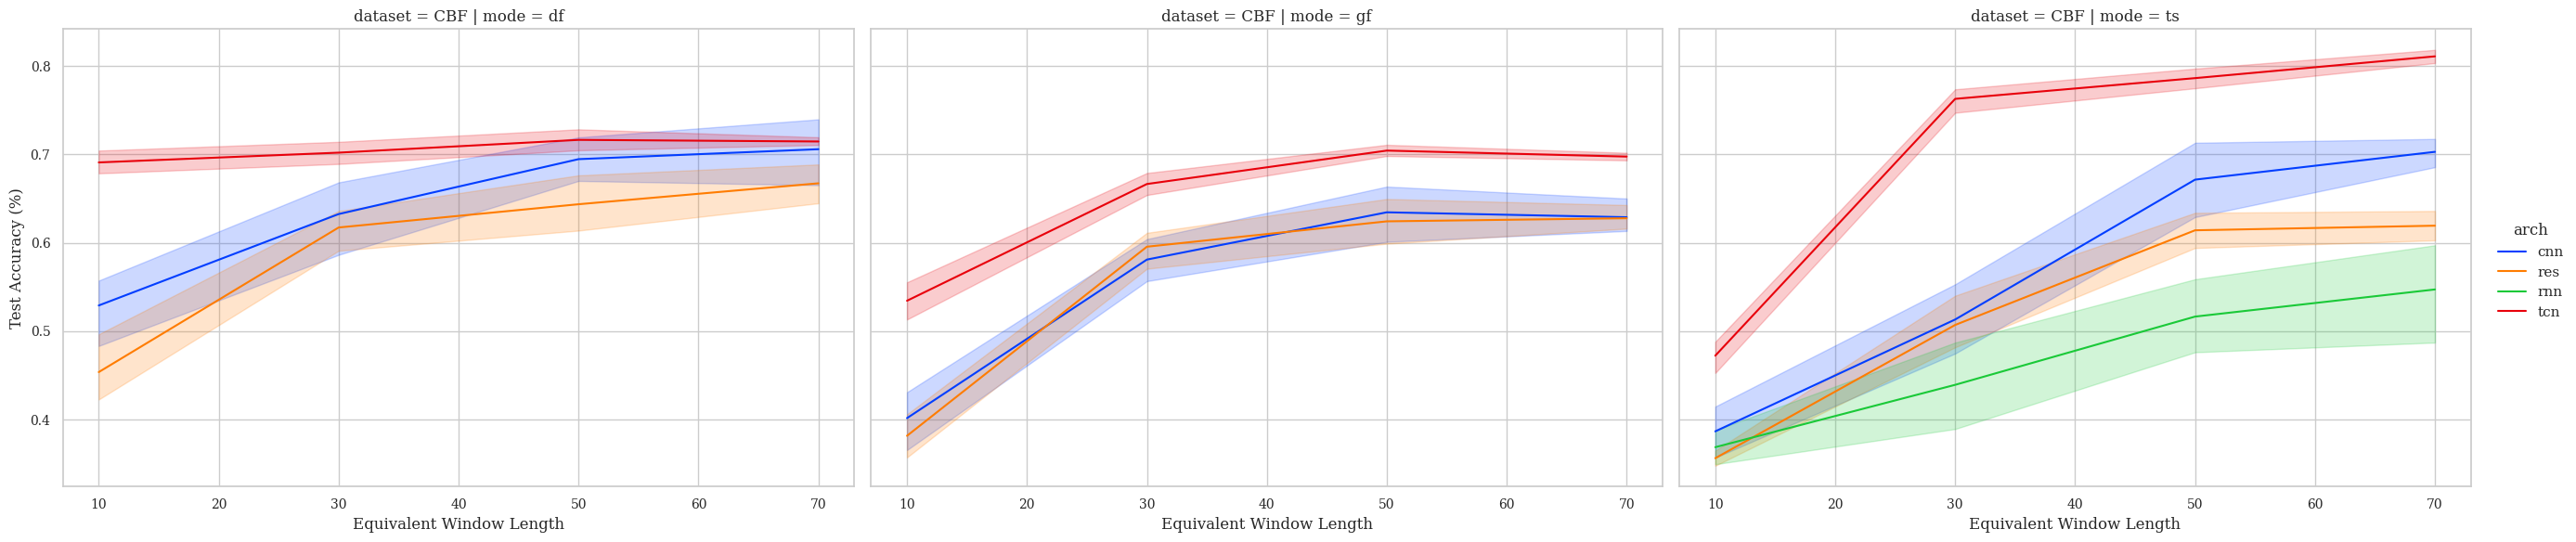

In [34]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="eq_wdw_length", y="test_acc", hue='arch', kind="line", palette="bright", col="mode", row="dataset",
                height=6, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("figures/time_dilation.pdf", bbox_inches='tight')

# Section 5.2: Pattern Stride Effects

In [35]:
# data = df[df["pretrain_mode"] == False].copy()

# data = data[data['train_exc_limit'] == 32]
# data = data[data["window_time_stride"] == 7]
# data = data[data["pretrained"] == False]

# data = data[data["dataset"] == "CBF"]

In [36]:
# # Generate a table
# data.groupby(["dataset", "mode", "arch", "window_patt_stride"])[cols].mean()

In [37]:
# # Generate a plot
# data["Method"] =  data["arch"] + "_" + data["mode"]
# data.sort_values(["Method"], inplace=True)

# sns.set_theme()
# sns.set_style("whitegrid")
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='small')
# plt.rc('ytick', labelsize='small')

# g = sns.relplot(data=data, x="window_patt_stride", y="val_acc", hue='Method', kind="line", palette="bright",
#                 height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

# g.set_ylabels("Test Accuracy (%)")
# g.set_xlabels("Window Pattern Stride");

# g.savefig("figures/pattern_stride_acc.pdf", bbox_inches='tight')

In [38]:
# # Generate a plot

# sns.set_theme()
# sns.set_style("whitegrid")
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='small')
# plt.rc('ytick', labelsize='small')

# data["Time"] = data["time_train"]/60/60

# g = sns.relplot(data=data, x="window_patt_stride", y='Time', hue='Method', kind="line", palette="bright",
#                 height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

# g.set_ylabels("Training Time (Hours)")
# g.set_xlabels("Window Pattern Stride");

# g.savefig("figures/pattern_stride_time.pdf", bbox_inches='tight')

# Section 5.3: Self-Supervised Pretrain Effects

In [39]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

# data = data[data["dataset"] == "CBF"]
# data = data[data["mode"] == "df"]
# data = data[data["arch"].isin(["cnn", "tcn"])]

In [40]:
data.groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean()

test_acc  \
dataset mode arch pretrained stride_series train_exc_limit             
CBF     df   cnn  False      False         4.0              0.490861   
                                           8.0              0.535361   
                                           16.0             0.600245   
                                           32.0             0.705981   
                  True       False         4.0              0.542895   
                                           8.0              0.632725   
                                           16.0             0.655866   
                                           32.0             0.743037   
                             True          4.0              0.601515   
                                           8.0              0.636081   
                                           16.0             0.650724   
             res  False      False         4.0              0.442121   
                                           32.0             0.667398   
                  True       False         4.0              0.495801   
                             True          4.0              0.397826   
             tcn  False      False         4.0              0.274494   
                                           8.0              0.479578   
                                           16.0             0.654438   
                                           32.0             0.714709   
                  True       False         4.0              0.545859   
                                           8.0              0.576083   
                             True          4.0              0.558208   
                                           8.0              0.611525   
        gf   cnn  False      False         4.0              0.468138   
                                           8.0              0.568552   
                                           32.0             0.629049   
                  True       False         4.0              0.543718   
                                           8.0              0.567160   
                                           16.0             0.605264   
                             True          4.0              0.553269   
                                           8.0              0.576001   
                                           16.0             0.604652   
             res  False      False         4.0              0.370822   
                                           8.0              0.454367   
                                           32.0             0.627898   
                  True       False         4.0              0.352379   
                             True          4.0              0.429771   
             tcn  False      False         4.0              0.375762   
                                           32.0             0.697638   
                  True       False         4.0              0.573851   
                             True          4.0              0.471596   

                                                             test_f1  \
dataset mode arch pretrained stride_series train_exc_limit             
CBF     df   cnn  False      False         4.0              0.490861   
                                           8.0              0.535361   
                                           16.0             0.600245   
                                           32.0             0.705981   
                  True       False         4.0              0.542895   
                                           8.0              0.632725   
                                           16.0             0.655866   
                                           32.0             0.743037   
                             True          4.0              0.601515   
                                           8.0              0.636081   
                                           16.0             0.650724   
             res  False    

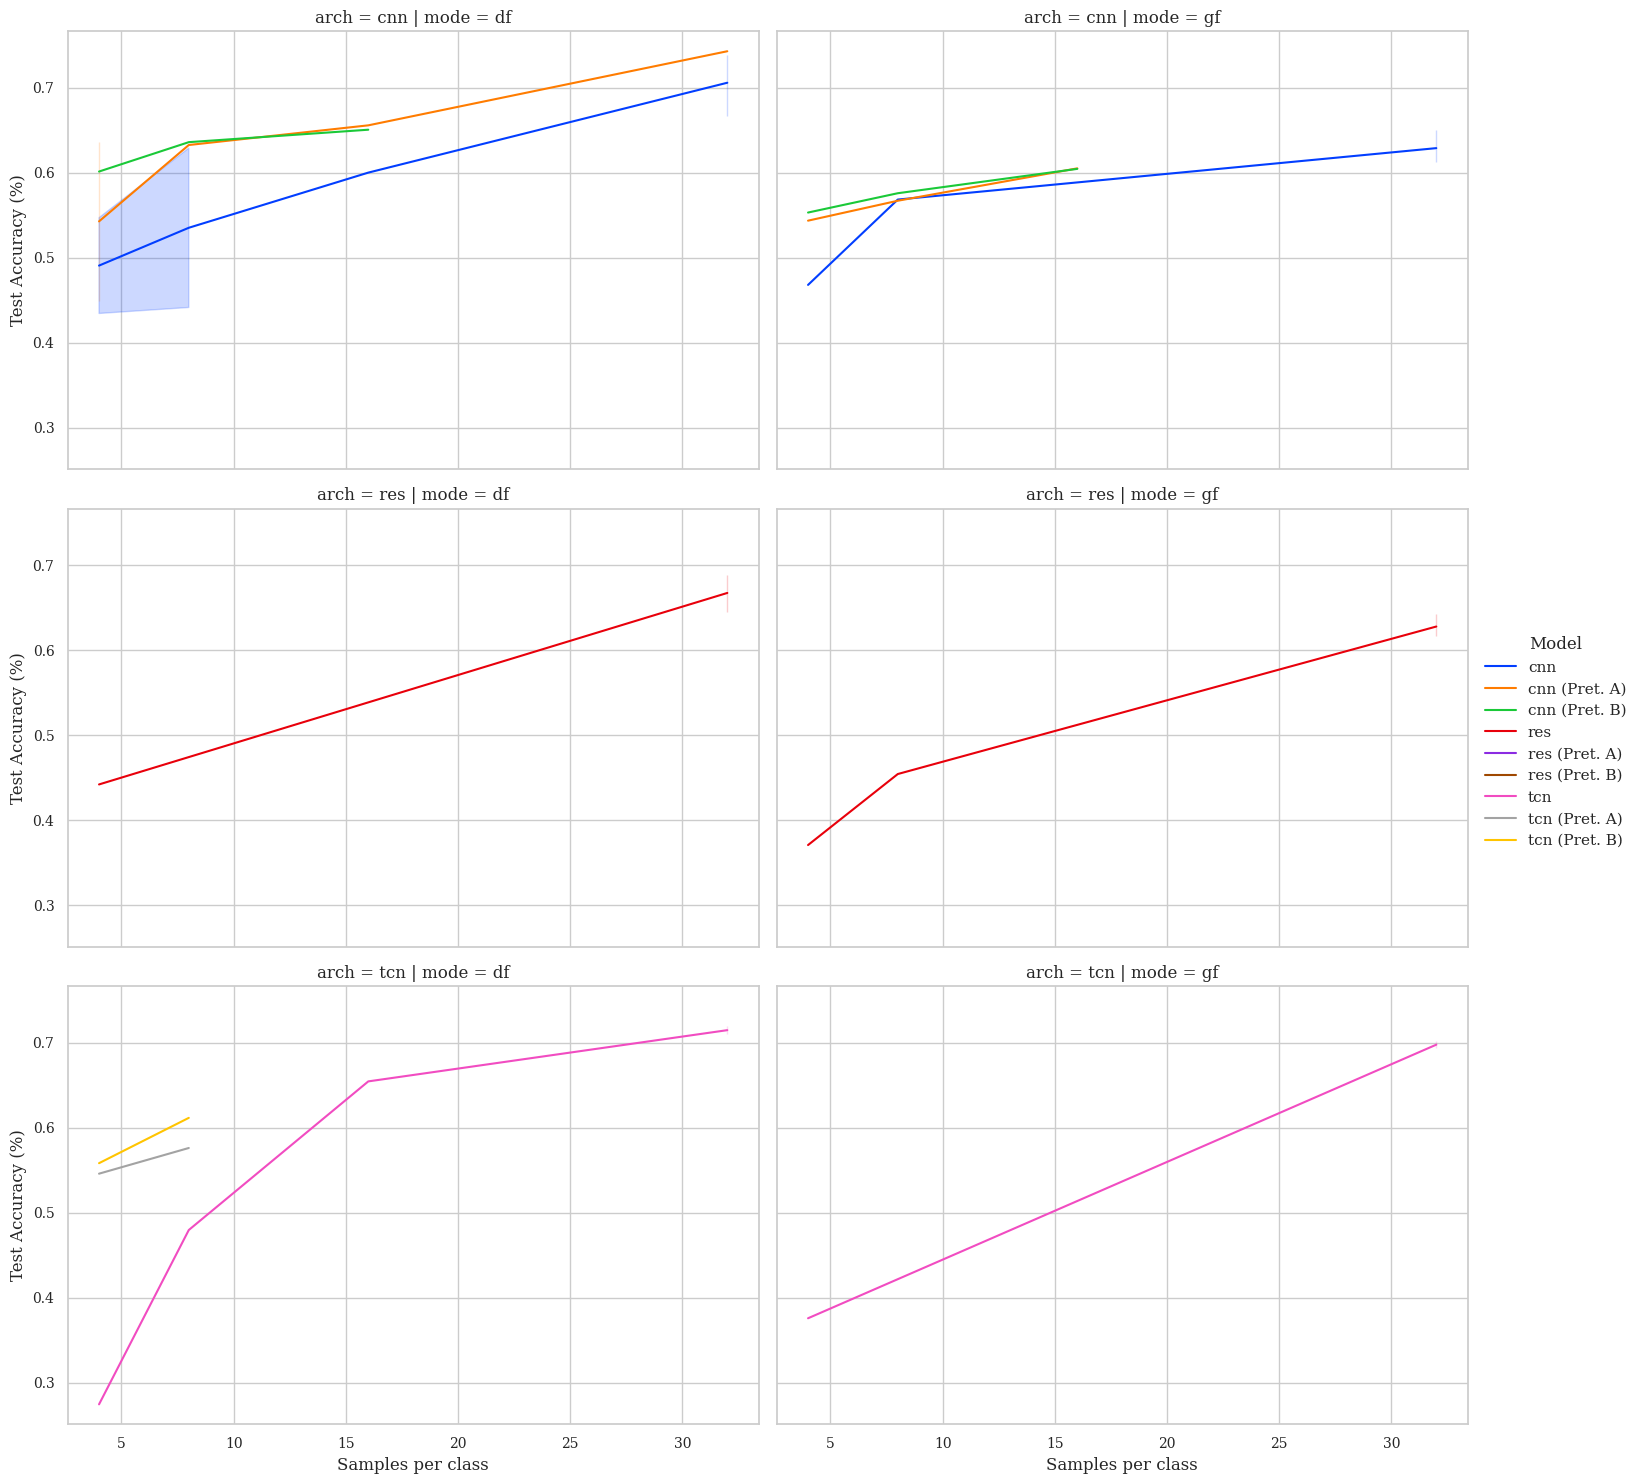

In [44]:
# Generate a plot
data["Model"] = data["arch"] + " " + data["pretrained"].replace({True: "(Pret. ", False: ""}) + data["stride_series"].replace({True: "B)", False: "A)"})
data["Model"].replace({"cnn A)": "cnn", "res A)": "res", "tcn A)": "tcn"}, inplace=True)
data.sort_values(['Model'], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="train_exc_limit", y="test_acc", hue='Model', kind="line", palette="bright", col="mode", row="arch", 
                height=5, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Samples per class");

g.savefig("figures/pretrain.pdf", bbox_inches='tight')